

# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [5]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [6]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [7]:
df.describe()

ine_code    new_cases          PCR         TestAc       activos  \
count  23205.000000  8251.000000  6381.000000     815.000000   2893.000000   
mean      26.497177   132.553266   136.981549   23469.895706   1274.970273   
std       15.007998   321.031976   263.942665   36697.812207   1775.723076   
min        1.000000    -2.000000    -1.000000       0.000000     -1.000000   
25%       13.000000    11.000000    14.000000      11.000000    272.000000   
50%       26.000000    45.000000    59.000000     354.000000    662.000000   
75%       39.000000   123.000000   145.000000   64890.000000   1444.000000   
max       52.000000  5741.000000  3968.000000  103676.000000  14617.000000   

       hospitalized  hospitalized_accumulated  hospitalized_new  \
count  16600.000000               1873.000000       1816.000000   
mean     215.140663              11281.829151       1101.626101   
std      671.036914              24354.374206       1806.464499   
min        0.000000                  0.000000        -16.000000   
25%       25.000000                245.000000        100.000000   
50%       83.000000               1020.000000        389.500000   
75%      198.000000               3166.000000       1244.500000   
max    15227.000000             100897.000000       8431.000000   

       intensive_care      deceased  cases_accumulated  cases_accumulated_PCR  \
count    16823.000000  18502.000000       11902.000000           12424.000000   
mean        36.628485    899.402713       21374.530499           21754.658725   
std         88.119122   2219.864282       43440.286089           63745.709560   
min          0.000000      0.000000           0.000000               0.000000   
25%          4.000000    152.000000        1709.500000            2236.250000   
50%         14.000000    366.000000        5606.000000            5233.500000   
75%         36.000000    723.750000       24572.250000           16780.250000   
max       1528.000000  17107.000000      423142.000000          621363.000000   

         recovered  deceased_hosp_eus     num_casos  num_casos_prueba_pcr  \
count   454.000000         585.000000  20332.000000          20332.000000   
mean   2148.590308         391.068376    126.865335            104.845318   
std    1975.099582         243.192336    354.805704            298.712366   
min     125.000000         130.000000      0.000000              0.000000   
25%     317.000000         219.000000      2.000000              1.000000   
50%    1652.500000         285.000000     26.000000             22.000000   
75%    3430.500000         594.000000    113.000000             96.000000   
max    6994.000000        1000.000000   6743.000000           6726.000000   

       num_casos_prueba_test_ac  num_casos_prueba_ag  num_casos_prueba_elisa  \
count              20332.000000         20332.000000            20332.000000   
mean                   0.233917            21.500148                0.181045   
std                    1.403417           109.873441                2.067126   
min                    0.000000             0.000000                0.000000   
25%                    0.000000             0.000000                0.000000   
50%                    0.000000             0.000000                0.000000   
75%                    0.000000             4.000000                0.000000   
max                   32.000000          3411.000000               86.000000   

       num_casos_prueba_desconocida  num_casos_cum1    num_casos2  \
count                  20332.000000    20332.000000  22984.000000   
mean                       0.104909    12743.522870    138.504307   
std                        1.260073    36583.561122    400.759249   
min                        0.000000        0.000000      0.000000   
25%                        0.000000      751.000000      2.000000   
50%                        0.000000     3041.500000     30.000000   
75%                        0.000000    10427.000000    119.000000   
max    

y un muestreo de valores y de algunas columnas de interés:

In [8]:
df.head()

date          province  ine_code                     ccaa  new_cases  \
0  2020-01-01          Albacete         2     Castilla - La Mancha        NaN   
1  2020-01-01  Alicante/Alacant         3     Comunitat Valenciana        NaN   
2  2020-01-01           Almería         4                Andalucía        NaN   
3  2020-01-01       Araba/Álava         1               País Vasco        NaN   
4  2020-01-01          Asturias        33  Asturias, Principado de        NaN   

   PCR  TestAc  activos  hospitalized  hospitalized_accumulated  \
0  NaN     NaN      NaN           NaN                       NaN   
1  NaN     NaN      NaN           NaN                       NaN   
2  NaN     NaN      NaN           NaN                       NaN   
3  NaN     NaN      NaN           NaN                       NaN   
4  NaN     NaN      NaN           NaN                       NaN   

   hospitalized_new  intensive_care  deceased  cases_accumulated  \
0               NaN             NaN       NaN                NaN   
1               NaN             NaN       NaN                NaN   
2               NaN             NaN       NaN                NaN   
3               NaN             NaN       NaN                NaN   
4               NaN             NaN       NaN                NaN   

   cases_accumulated_PCR  recovered  deceased_hosp_eus  num_casos  \
0                    NaN        NaN                NaN        0.0   
1                    NaN        NaN                NaN        1.0   
2                    NaN        NaN                NaN        0.0   
3                    NaN        NaN                NaN        0.0   
4                    NaN        NaN                NaN        0.0   

   num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_ag  \
0                   0.0                       0.0                  0.0   
1                   1.0                       0.0                  0.0   
2                   0.0                       0.0                  0.0   
3                   0.0                       0.0                  0.0   
4                   0.0                       0.0                  0.0   

   num_casos_prueba_elisa  num_casos_prueba_desconocida  num_casos_cum1  \
0                     0.0                           0.0             0.0   
1                     0.0                           0.0             1.0   
2                     0.0                           0.0             0.0   
3                     0.0                           0.0             0.0   
4                     0.0                           0.0             0.0   

   num_casos2  num_hosp  num_uci  num_def  num_casos_cum2  num_hosp_cum  \
0         0.0       0.0      0.0      0.0             0.0           0.0   
1         0.0       1.0      0.0      0.0             0.0           1.0   
2         0.0       0.0      0.0      0.0             0.0           0.0   
3         0.0       0.0      0.0      0.0             0.0           0.0   
4         0.0       0.0      0.0      0.0             0.0           0.0   

   num_uci_cum  num_def_cum  poblacion  cases_per_cienmil  \
0          0.0          0.0     388167                NaN   
1          0.0          0.0    1858683                NaN   
2          0.0          0.0     716820                NaN   
3          0.0          0.0     331549                NaN   
4          0.0          0.0    1022800                NaN   

   intensive_care_per_1000000  deceassed_per_100000  hospitalized_per_100000  \
0                         NaN                   NaN                      NaN   
1                         NaN                   NaN                      NaN   
2                         NaN                   NaN                      NaN   
3                         NaN                   NaN                      NaN   
4                         NaN                   NaN                      NaN   

   cases_14days  cases_7days  cases_PCR_14days  cases_PCR_7days  daily_cases  \
0           NaN     

In [9]:
df.tail()

date           province  ine_code                  ccaa  \
23200  2021-03-22              Soria        42       Castilla y León   
23201  2021-03-22             Toledo        45  Castilla - La Mancha   
23202  2021-03-22  Valencia/València        46  Comunitat Valenciana   
23203  2021-03-22         Valladolid        47       Castilla y León   
23204  2021-03-22             Zamora        49       Castilla y León   

       new_cases   PCR  TestAc  activos  hospitalized  \
23200       18.0   NaN     NaN      NaN          35.0   
23201        NaN  98.0     NaN      NaN          44.0   
23202       98.0   NaN     NaN      NaN         173.0   
23203       11.0   NaN     NaN      NaN          72.0   
23204        0.0   NaN     NaN      NaN           9.0   

       hospitalized_accumulated  hospitalized_new  intensive_care  deceased  \
23200                       NaN               NaN             9.0       NaN   
23201                       NaN               NaN            12.0    2093.0   
23202                       NaN               NaN            75.0    3617.0   
23203                       NaN               NaN            44.0       NaN   
23204                       NaN               NaN             5.0       NaN   

       cases_accumulated  cases_accumulated_PCR  recovered  deceased_hosp_eus  \
23200                NaN                 9143.0        NaN                NaN   
23201                NaN                63030.0        NaN                NaN   
23202           200409.0                    NaN        NaN                NaN   
23203                NaN                48166.0        NaN                NaN   
23204                NaN                12733.0        NaN                NaN   

       num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
23200        NaN                   NaN                       NaN   
23201        NaN                   NaN                       NaN   
23202        NaN                   NaN                       NaN   
23203        NaN                   NaN                       NaN   
23204        NaN                   NaN                       NaN   

       num_casos_prueba_ag  num_casos_prueba_elisa  \
23200                  NaN                     NaN   
23201                  NaN                     NaN   
23202                  NaN                     NaN   
23203                  NaN                     NaN   
23204                  NaN                     NaN   

       num_casos_prueba_desconocida  num_casos_cum1  num_casos2  num_hosp  \
23200                           NaN             NaN         NaN       NaN   
23201                           NaN             NaN         NaN       NaN   
23202                           NaN             NaN         NaN       NaN   
23203                           NaN             NaN         NaN       NaN   
23204                           NaN             NaN         NaN       NaN   

       num_uci  num_def  num_casos_cum2  num_hosp_cum  num_uci_cum  \
23200      NaN      NaN             NaN           NaN          NaN   
23201      NaN      NaN             NaN           NaN          NaN   
23202      NaN      NaN             NaN           NaN          NaN   
23203      NaN      NaN             NaN           NaN          NaN   
23204      NaN      NaN             NaN           NaN          NaN   

       num_def_cum  poblacion  cases_per_cienmil  intensive_care_per_1000000  \
23200          NaN      88636                NaN                       10.15   
23201          NaN     694844                NaN                        1.73   
23202          NaN    2565124            7812.84                        2.92   
23203          NaN     519546                NaN                        8.47   
23204          NaN     172539                NaN                        2.90   

       deceassed_per_100000  hospitalized_per_100000  cases_14days  \
23200                   NaN                    39.49           NaN   
23201                301.22         

In [10]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'hospitalized_accumulated',
       'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated',
       'cases_accumulated_PCR', 'recovered', 'deceased_hosp_eus', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_ag', 'num_casos_prueba_elisa',
       'num_casos_prueba_desconocida', 'num_casos_cum1', 'num_casos2',
       'num_hosp', 'num_uci', 'num_def', 'num_casos_cum2', 'num_hosp_cum',
       'num_uci_cum', 'num_def_cum', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7'

In [13]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

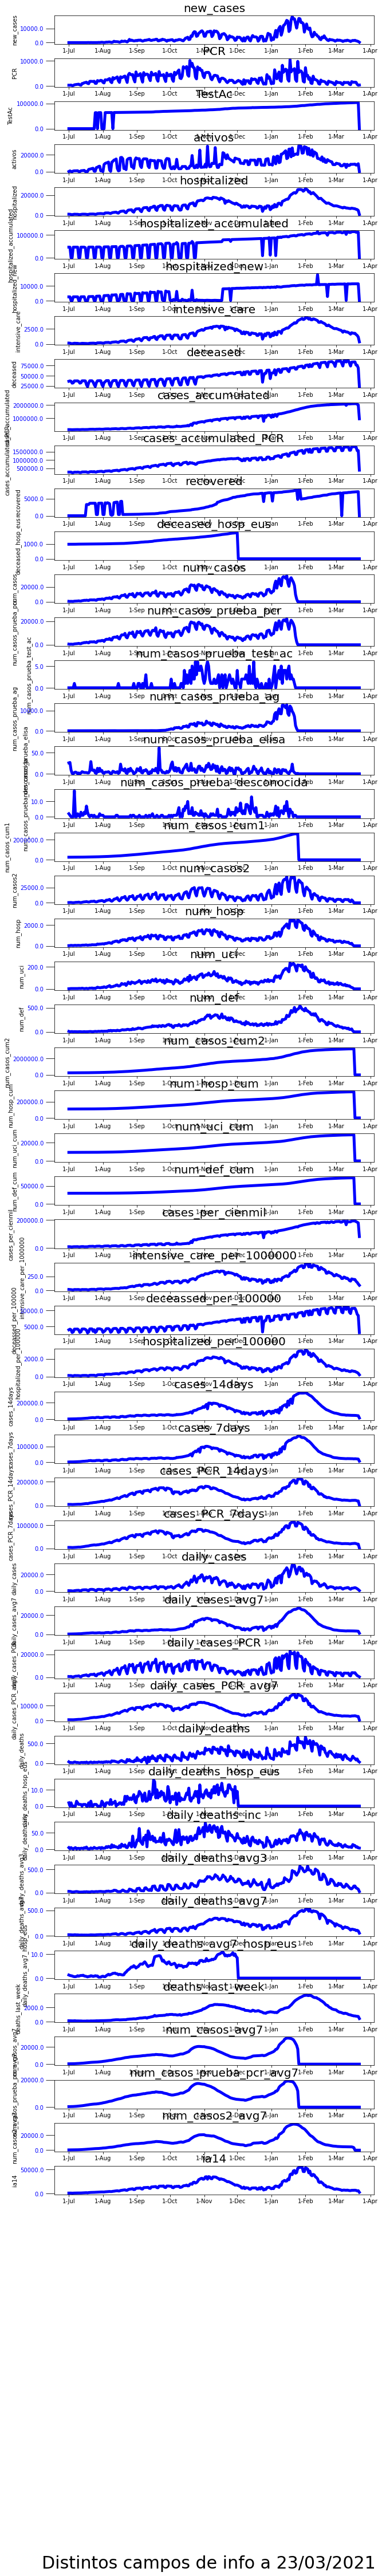

In [14]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [15]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

#clave_avg='daily_cases_PCR_avg7'
#clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'

color_ratio = 'red'
color_fill = 'lightblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio_IA7 = 'tasa_ia7_7_dias'
clave_ratio_IA14 = 'tasa_ia14_7_dias'
IA14='incidencia_acumulada_14'
IA7='incidencia_acumulada_7'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
casos_nuevos_aragon = 'casos_nuevos_aragon'
casos_nuevos_paisvasco = 'casos_nuevos_paisvasco'
ventana_IA14 = 14
ventana_IA7 = 7
# y_IA='IA a 14 días'
# y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
aragon = ['Zaragoza','Huesca','Teruel']
pais_vasco=['Bizkaia','Araba/Álava','Gipuzkoa']
for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in aragon:
    datos.loc[datos['province']==provincia,casos_nuevos_aragon]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in pais_vasco:
    datos.loc[datos['province']==provincia,casos_nuevos_paisvasco]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']   
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,IA14]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA14).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,IA14].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio_IA14]=serie  
    
    datos.loc[datos['province']==provincia,IA7]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA7).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,IA7].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio_IA7]=serie  
    


# Gráfico IA7

In [16]:
orden= ['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava','Ávila',
       'Asturias', 'Badajoz', 'Balears, Illes', 'Barcelona', 'Bizkaia',
       'Burgos', 'Cantabria', 'Castellón/Castelló', 'Ceuta',
       'Ciudad Real', 'Coruña, A', 'Cuenca', 'Cáceres', 'Cádiz',
       'Córdoba', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara',
       'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida', 'Lugo', 'Madrid',
       'Melilla', 'Murcia', 'Málaga', 'Navarra', 'Ourense', 'Palencia',
       'Palmas, Las', 'Pontevedra', 'Rioja, La', 'Salamanca',
       'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria',
       'Tarragona', 'Teruel', 'Toledo', 'Valencia/València', 'Valladolid',
       'Zamora', 'Zaragoza']

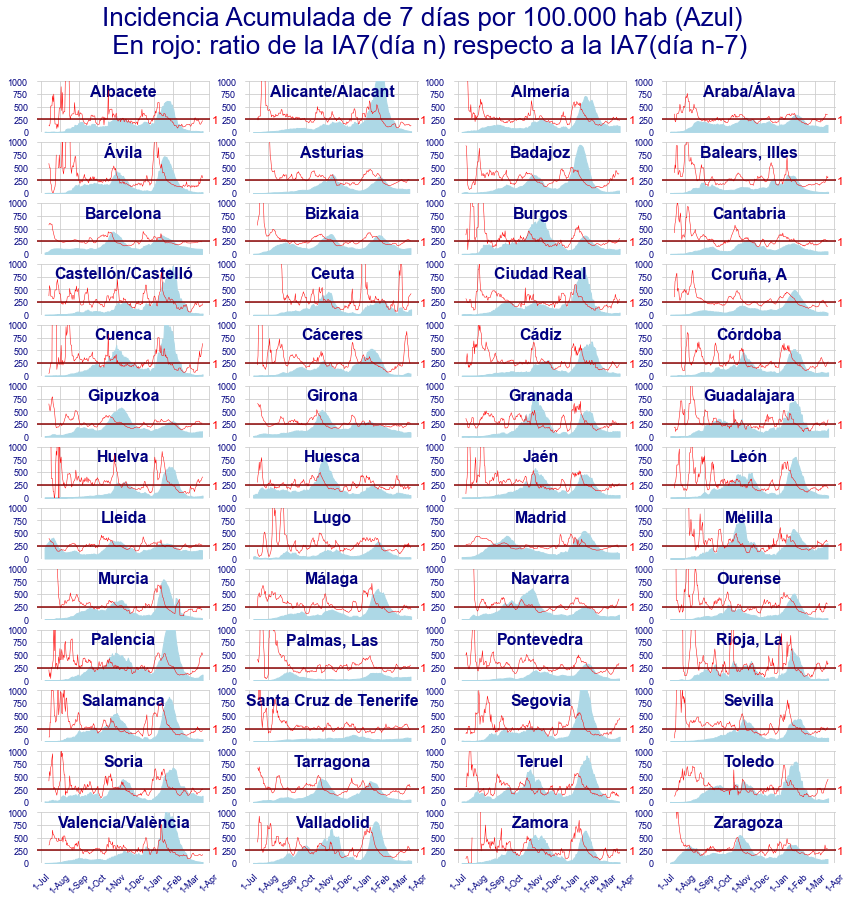

In [17]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province',hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0,sharey=False,col_order=orden)

# Título

titulo = 'Incidencia Acumulada de 7 días por 100.000 hab (Azul) \n En rojo: ratio de la IA7(día n) respecto a la IA7(día n-7)'


#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-b')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.set_ylim(0,1000)
    ax1.set_yticks([0,250,500,750,1000])
    
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.fill_between(df_datos['date'].unique(), df_datos[IA7],color=color_fill)
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio_IA7], lw=.5, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.axhline(1,color=color_linea)
    
g.map(grafica,'province')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
g.fig.subplots_adjust(top=.9,wspace=0.2,hspace=0.2)
plt.savefig('graficos/ia7_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()


## Gráfico IA14

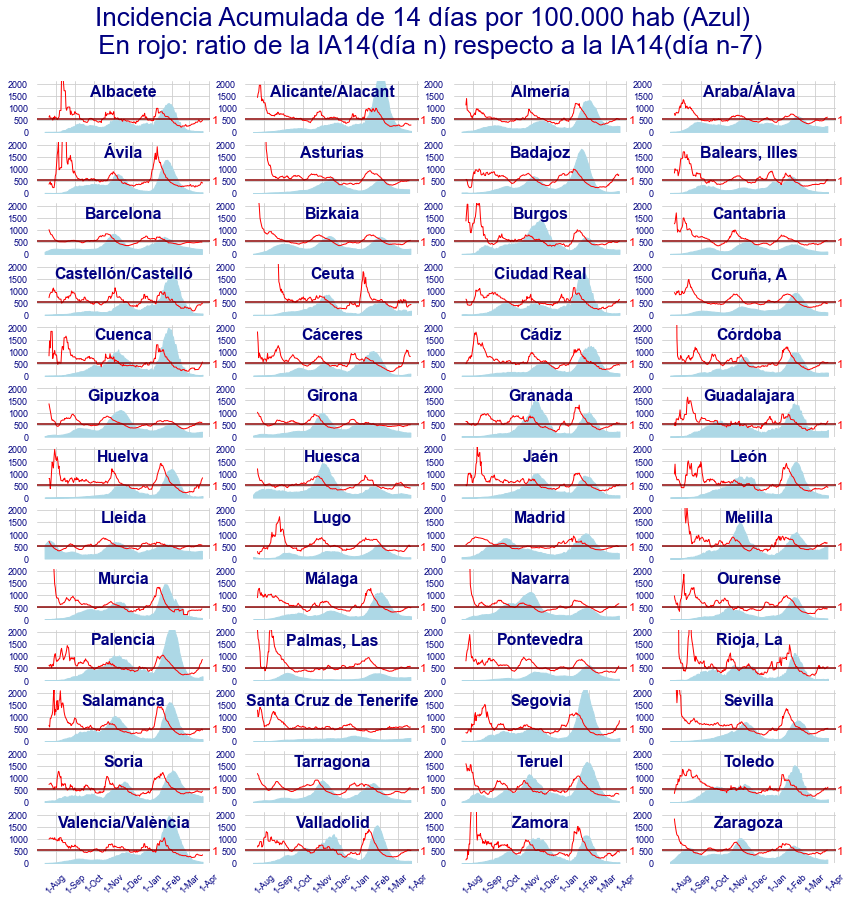

In [18]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province',hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0,sharey=False,col_order=orden)

# Título

titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n En rojo: ratio de la IA14(día n) respecto a la IA14(día n-7)'


#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-b')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.set_ylim(0,2100)
    ax1.set_yticks([0,300,600,900,1200])
    ax1.set_yticks([0,500,1000,1500,2000])
    
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.fill_between(df_datos['date'].unique(), df_datos[IA14],color=color_fill)
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio_IA14], lw=1, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.axhline(1,color=color_linea)
    
g.map(grafica,'province')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
g.fig.subplots_adjust(top=.9,wspace=0.2,hspace=0.2)
plt.savefig('graficos/ia14_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [19]:
def grafico_IA7_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    
    clave_ratio_IA7 = 'tasa_ia7_7_dias'
    IA7='incidencia_acumulada_7'
    
    
    titulo = 'Incidencia Acumulada de 7 días por 100.000 hab (Azul) \n En rojo: ratio de la IA7(día n) respecto a la IA7(día n-7)'
    y_IA='IA a 7 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]
    
    y_max = datos_[IA7].max()
    
    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%b')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[IA7],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1500)
        #ponemos limites variables dependiendo del maximo valor truncado a 100
        ax1.set_ylim(0,(y_max//100+1)*100)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy',rotation=45)
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        #vamos a imprimir el valor de la última IA14
        style = dict(size=12, color=color_titulos,weight='normal')
        texto = ax1.annotate('{:0.1f}'.format(df_datos.iloc[-1][IA7]),
                            xy=(df_datos.iloc[-1]['date'],df_datos.iloc[-1][IA7]),
                            xycoords='data',
                            xytext=(0, 0), 
                            textcoords='offset points',
                            **style)
        
        #Aqui presentamos la ratio: lo anulo
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio_IA7], lw=.5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4.0) #la he cambiado desde 4
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
        
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

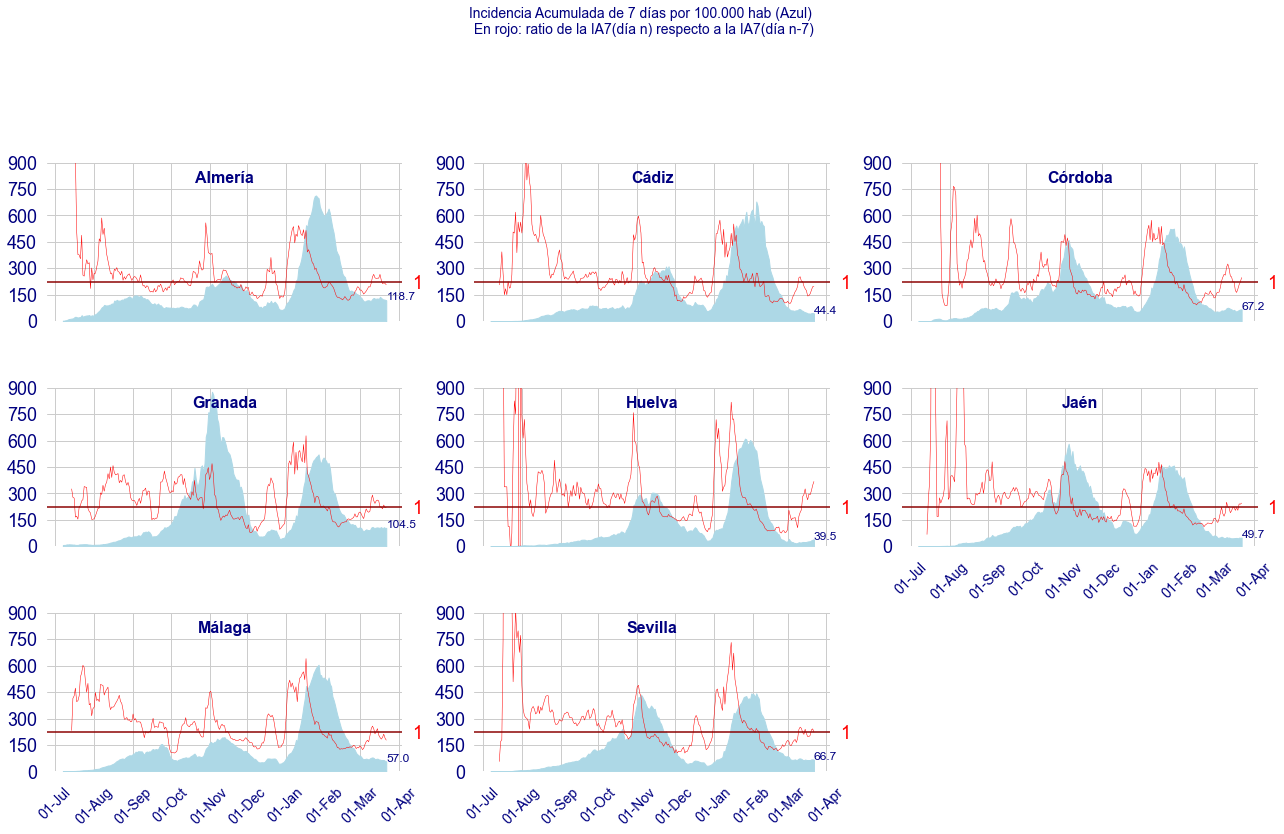

In [20]:
grafico_IA7_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia_IA7')

<Figure size 720x360 with 0 Axes>

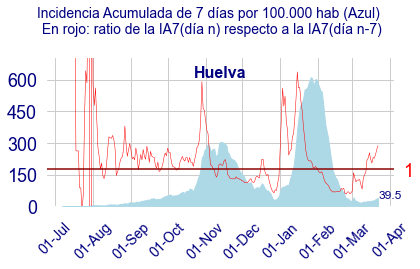

In [21]:
grafico_IA7_ratio(datos,campos,['Huelva'],'huelva_IA7')

<Figure size 720x360 with 0 Axes>

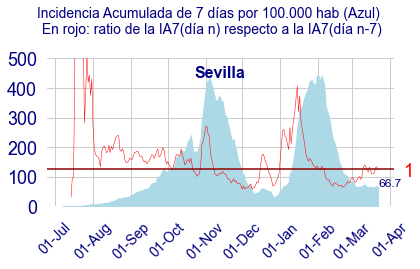

In [22]:
grafico_IA7_ratio(datos,campos,['Sevilla'],'sevilla_IA7')

<Figure size 720x360 with 0 Axes>

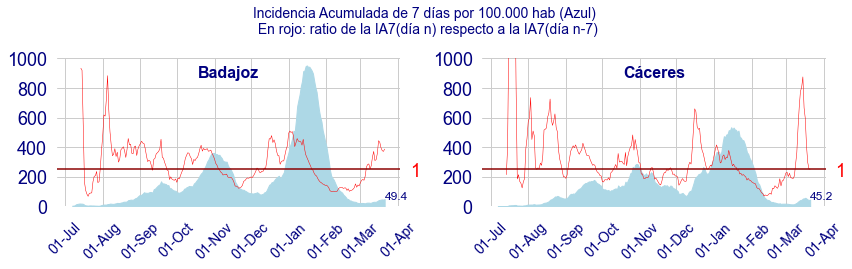

In [23]:
grafico_IA7_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_IA7')

<Figure size 720x360 with 0 Axes>

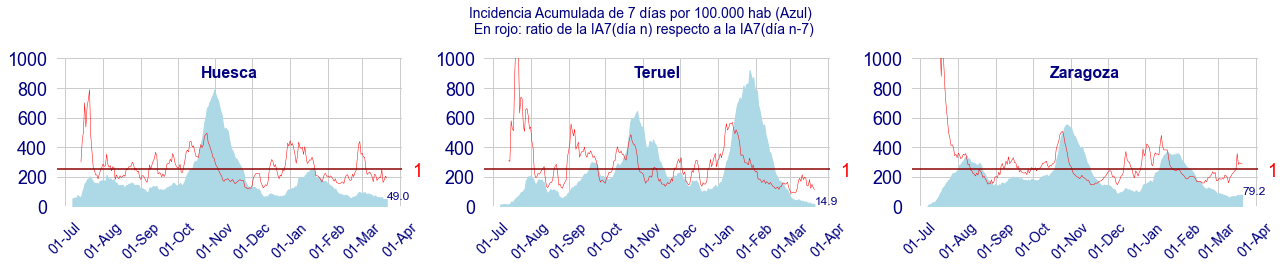

In [24]:
grafico_IA7_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon_ia7')

<Figure size 720x360 with 0 Axes>

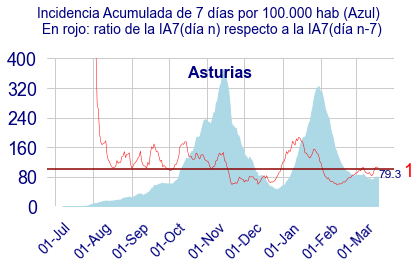

In [25]:
grafico_IA7_ratio(datos,campos,['Asturias'],'asturias_IA7')

<Figure size 720x360 with 0 Axes>

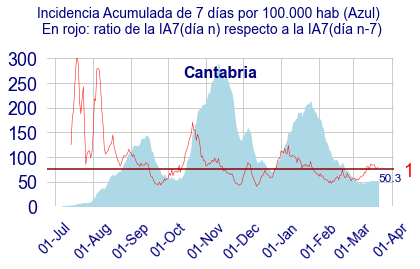

In [26]:
grafico_IA7_ratio(datos,campos,['Cantabria'],'cantabria_IA7')

<Figure size 720x360 with 0 Axes>

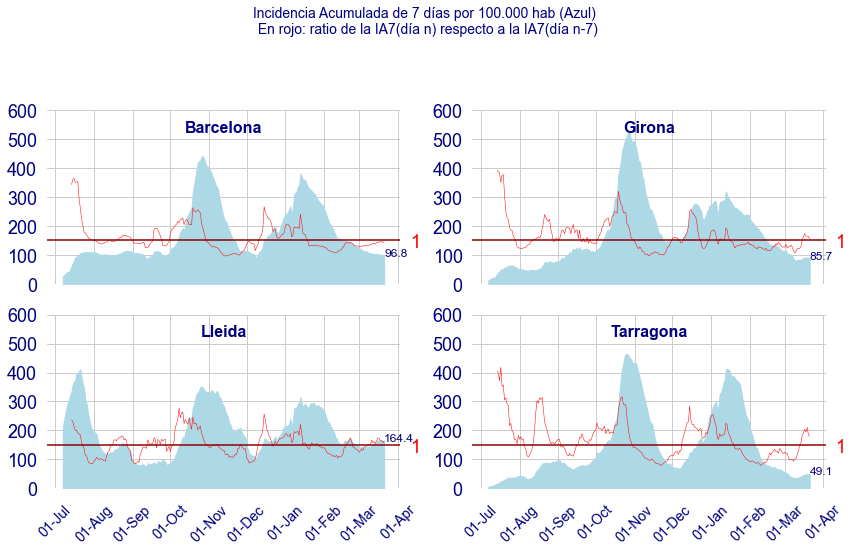

In [27]:
grafico_IA7_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña_IA7')

<Figure size 720x360 with 0 Axes>

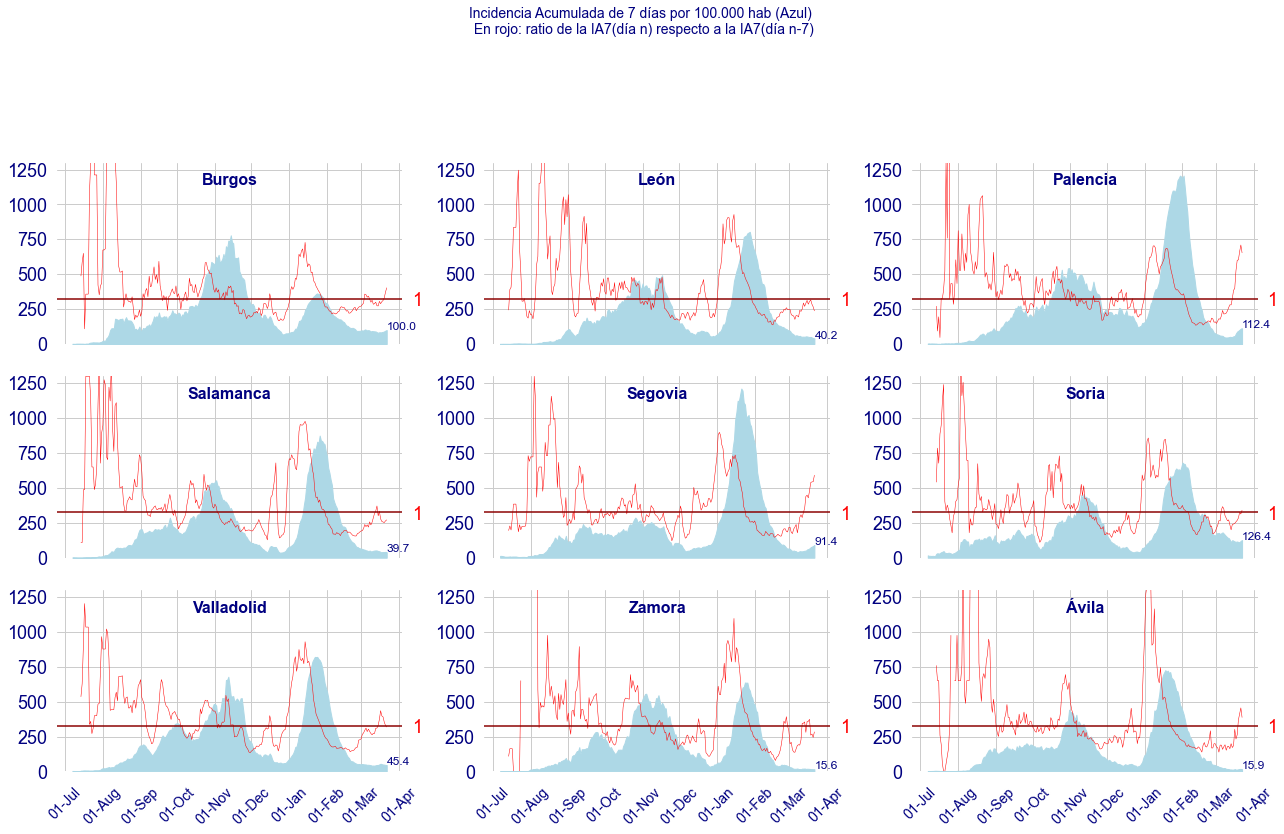

In [28]:
grafico_IA7_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon_IA7')

<Figure size 720x360 with 0 Axes>

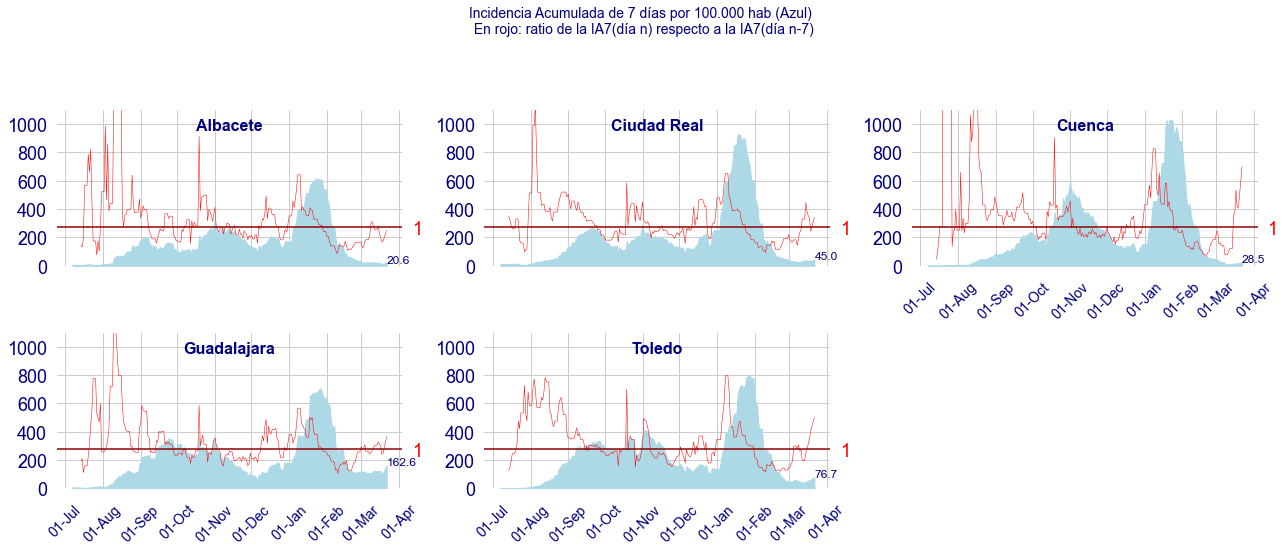

In [29]:
grafico_IA7_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha_IA7')

<Figure size 720x360 with 0 Axes>

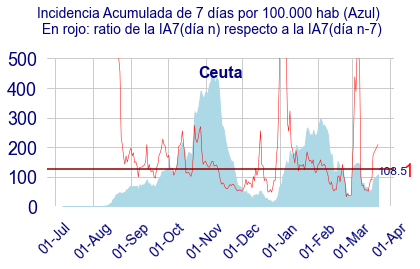

In [30]:
grafico_IA7_ratio(datos,campos,['Ceuta'],'ceuta_IA7')

<Figure size 720x360 with 0 Axes>

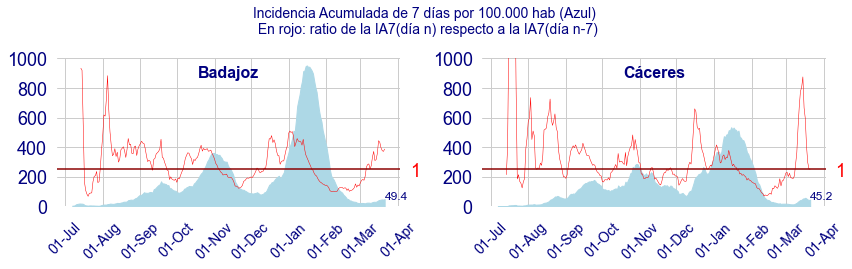

In [31]:
grafico_IA7_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_IA7')

<Figure size 720x360 with 0 Axes>

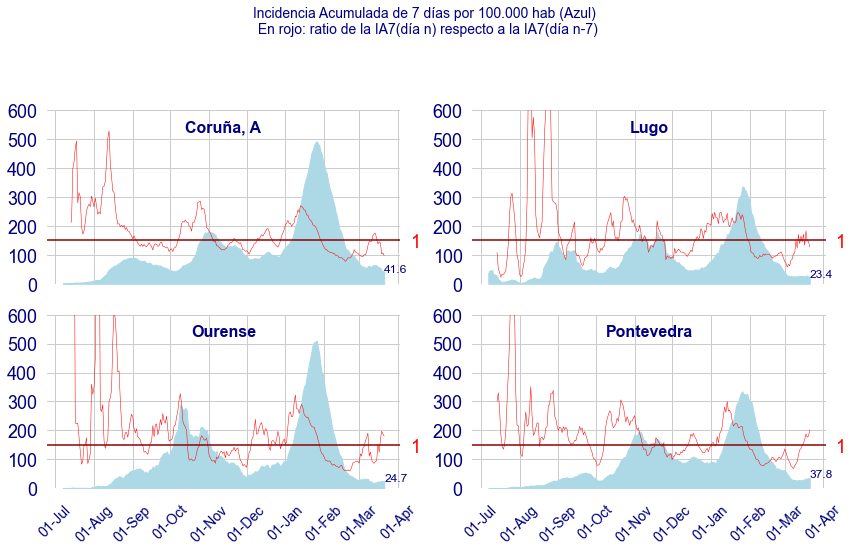

In [32]:
grafico_IA7_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia_IA7')

<Figure size 720x360 with 0 Axes>

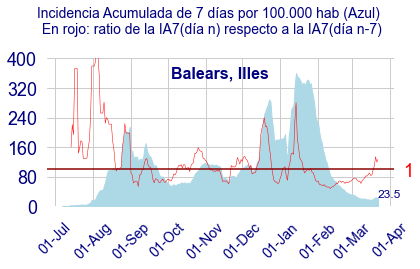

In [33]:
grafico_IA7_ratio(datos,campos,['Balears, Illes'],'baleares_IA7')

<Figure size 720x360 with 0 Axes>

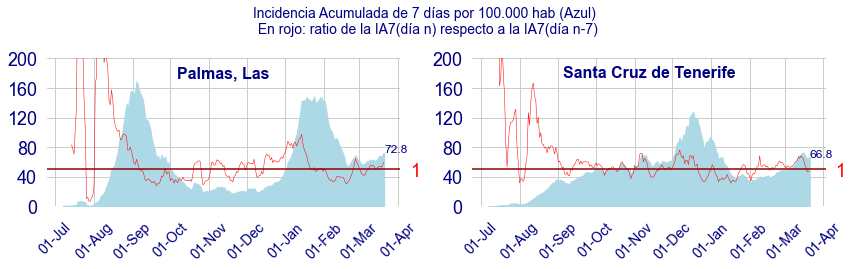

In [34]:
grafico_IA7_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias_IA7')

<Figure size 720x360 with 0 Axes>

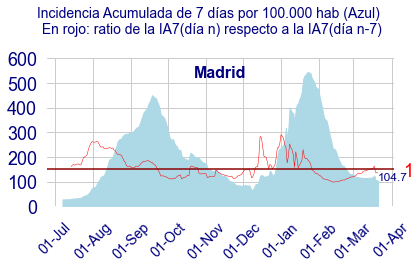

In [35]:
grafico_IA7_ratio(datos,campos,['Madrid'],'Madrid_IA7')

<Figure size 720x360 with 0 Axes>

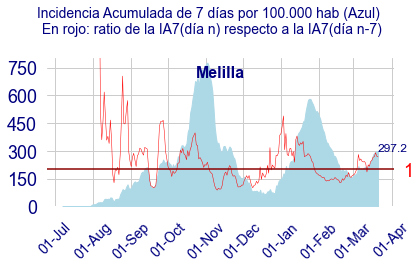

In [36]:
grafico_IA7_ratio(datos,campos,['Melilla'],'melilla_IA7')

<Figure size 720x360 with 0 Axes>

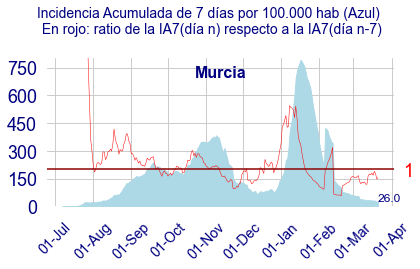

In [37]:
grafico_IA7_ratio(datos,campos,['Murcia'],'murcia_IA7')

<Figure size 720x360 with 0 Axes>

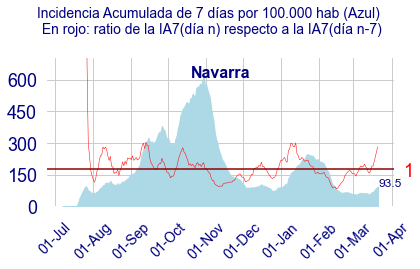

In [38]:
grafico_IA7_ratio(datos,campos,['Navarra'],'navarra_IA7')

<Figure size 720x360 with 0 Axes>

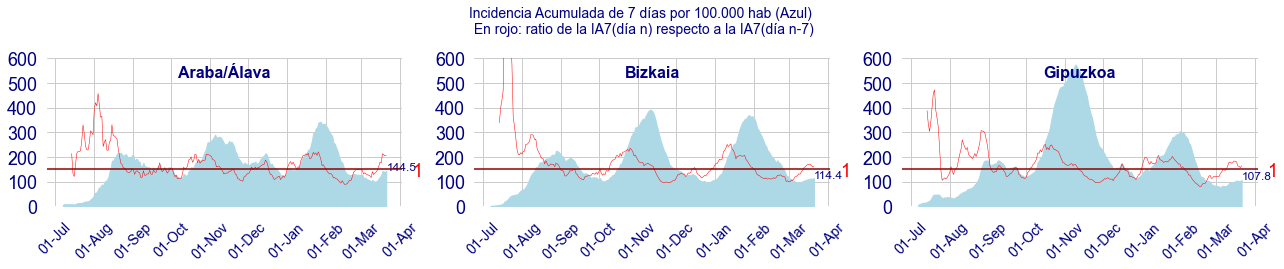

In [39]:
grafico_IA7_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco_IA7')

<Figure size 720x360 with 0 Axes>

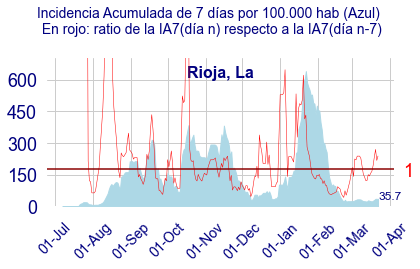

In [40]:
grafico_IA7_ratio(datos,campos,['Rioja, La'],'rioja_IA7')

<Figure size 720x360 with 0 Axes>

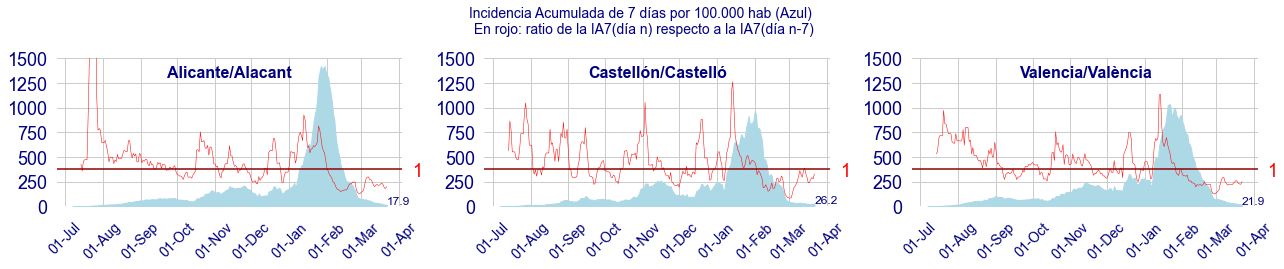

In [41]:
grafico_IA7_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia_IA7')

In [42]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    
    clave_ratio_IA14 = 'tasa_ia14_7_dias'
    IA14 = 'incidencia_acumulada_14'
    
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n En rojo: ratio de la IA14(día n) respecto a la IA14(día n-7)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]
    
    y_max = datos_[IA14].max()
    
    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%b')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[IA14],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1500)
        #ponemos limites variables dependiendo del maximo valor truncado a 100
        ax1.set_ylim(0,(y_max//100+1)*100)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy',rotation=45)
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        #vamos a imprimir el valor de la última IA14
        style = dict(size=12, color=color_titulos,weight='normal')
        texto = ax1.annotate('{:0.1f}'.format(df_datos.iloc[-1][IA14]),
                            xy=(df_datos.iloc[-1]['date'],df_datos.iloc[-1][IA14]),
                            xycoords='data',
                            xytext=(0, 0), 
                            textcoords='offset points',
                            **style)
        
        #Aqui presentamos la ratio: lo anulo
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio_IA14], lw=.5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4.0) #la he cambiado desde 4
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
        
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

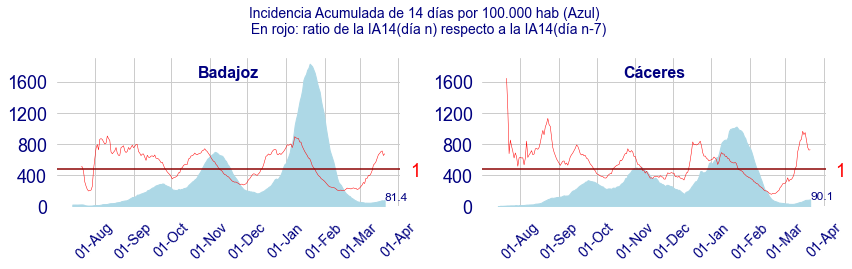

In [43]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_ia14')

<Figure size 720x360 with 0 Axes>

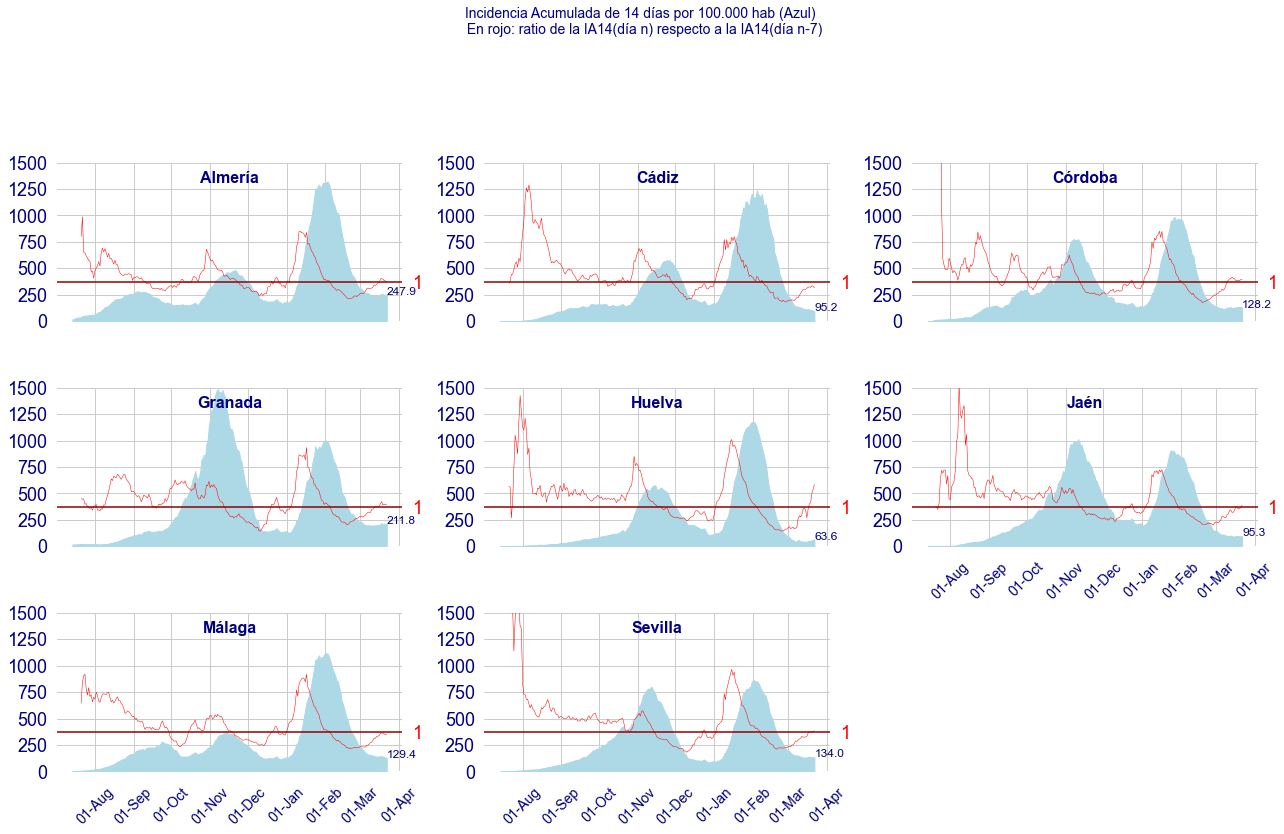

In [44]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

<Figure size 720x360 with 0 Axes>

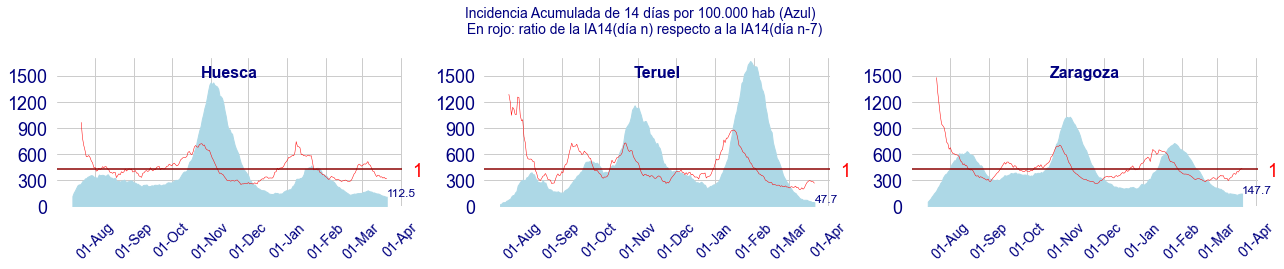

In [45]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon_ia14')

<Figure size 720x360 with 0 Axes>

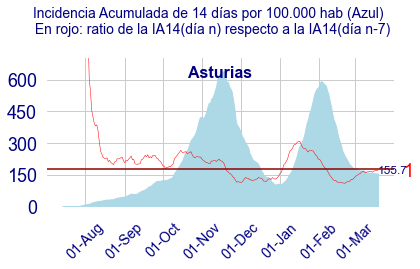

In [46]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias_ia14')

<Figure size 720x360 with 0 Axes>

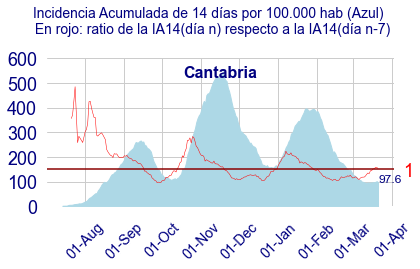

In [47]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria_ia14')

<Figure size 720x360 with 0 Axes>

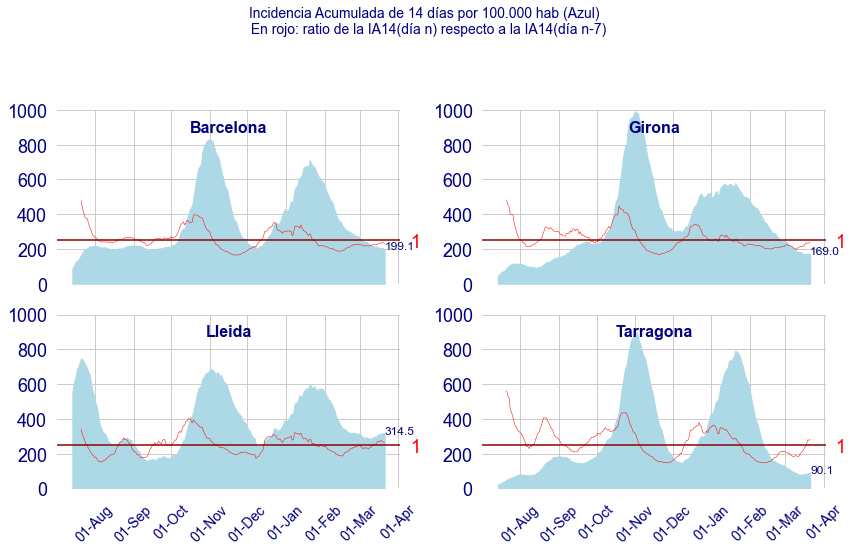

In [48]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña_ia14')

<Figure size 720x360 with 0 Axes>

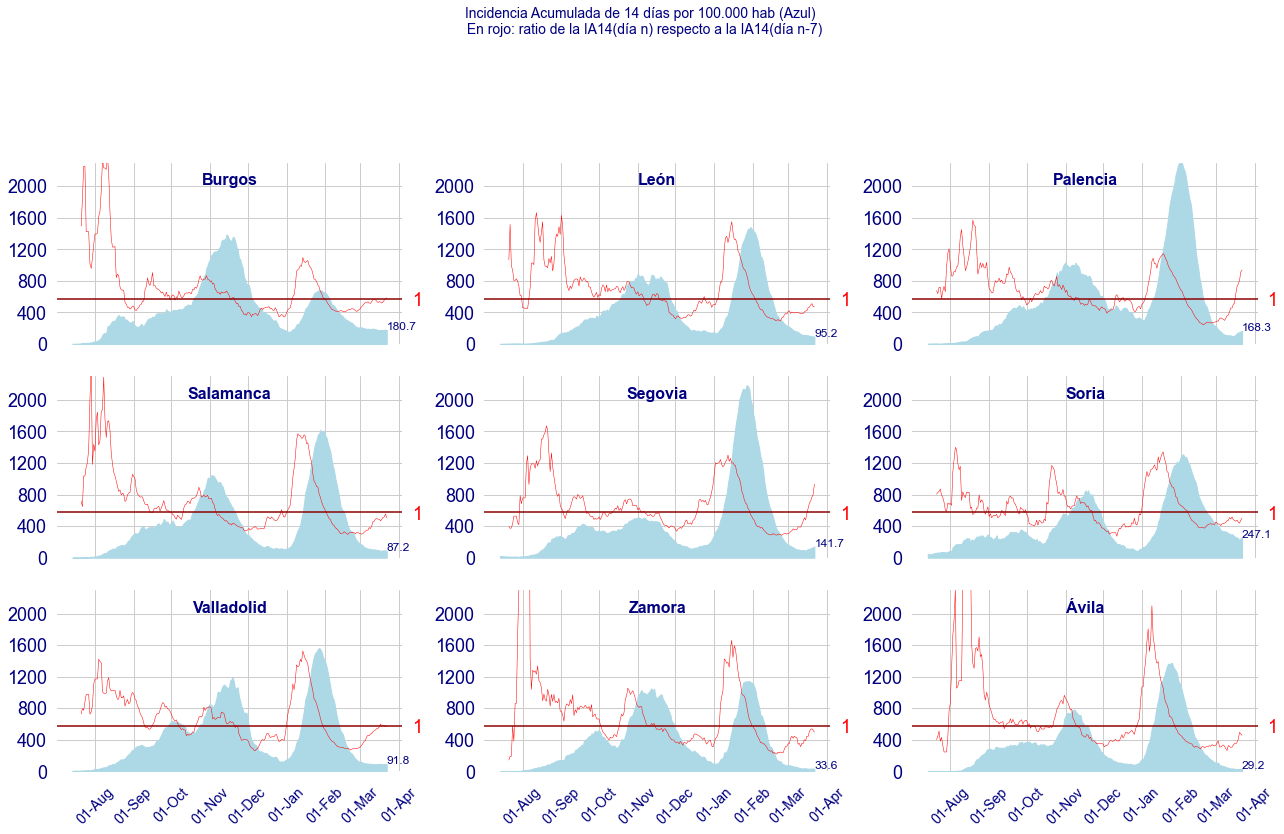

In [49]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon_ia14')

<Figure size 720x360 with 0 Axes>

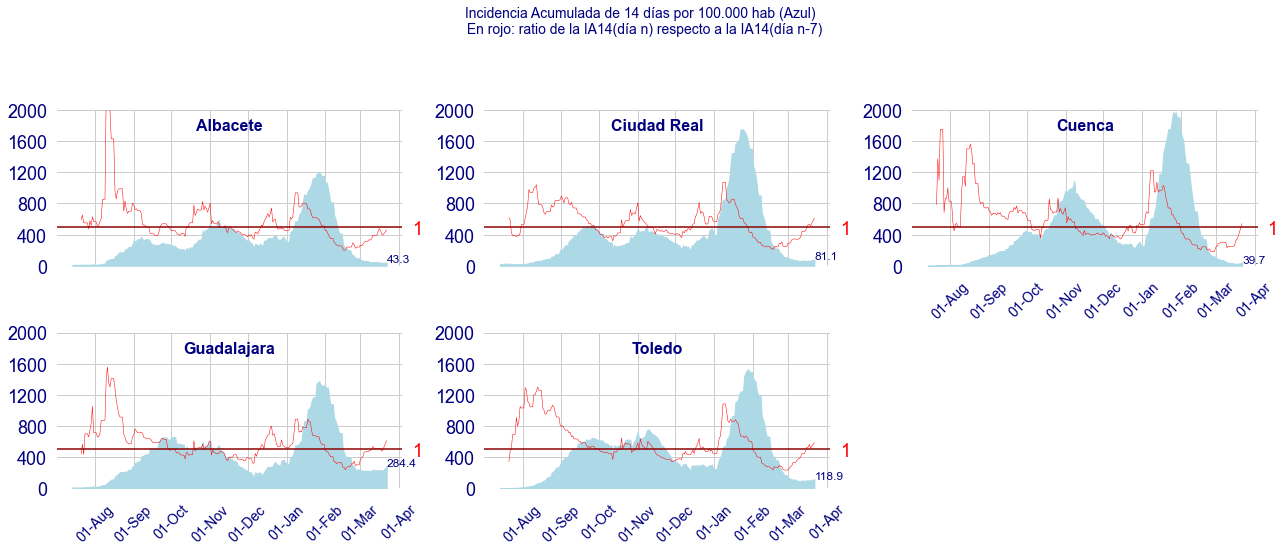

In [50]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha_ia14')

<Figure size 720x360 with 0 Axes>

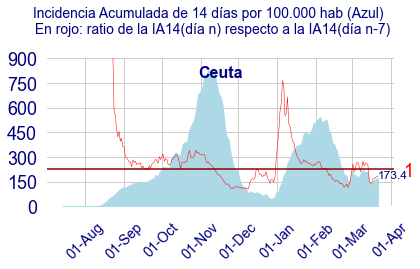

In [51]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta_ia14')

<Figure size 720x360 with 0 Axes>

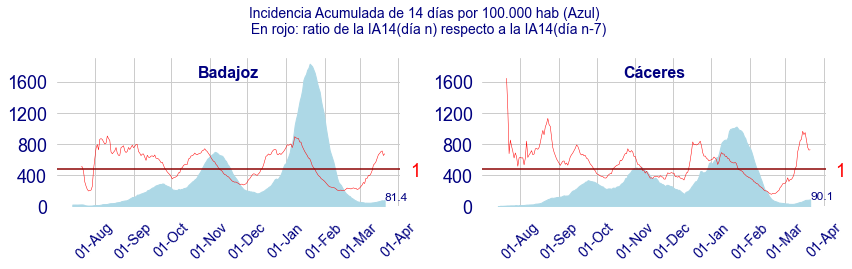

In [52]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura_ia14')

<Figure size 720x360 with 0 Axes>

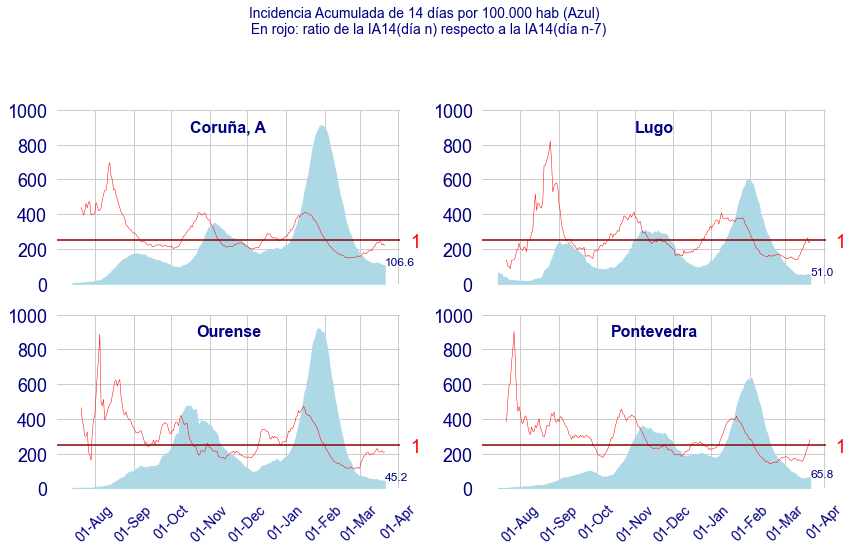

In [53]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

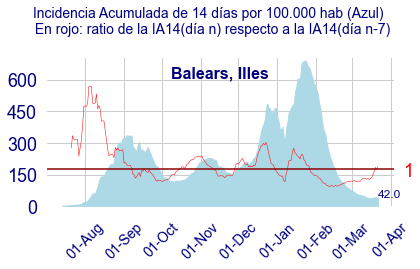

In [54]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

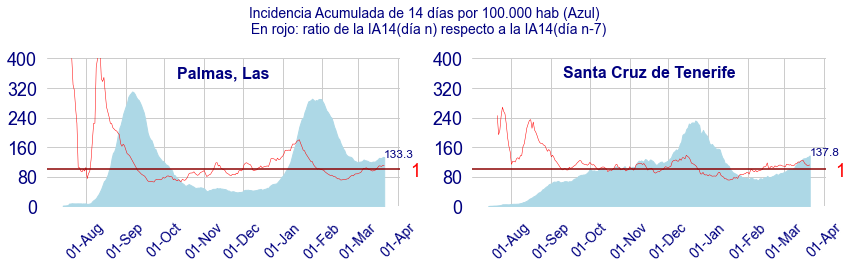

In [55]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

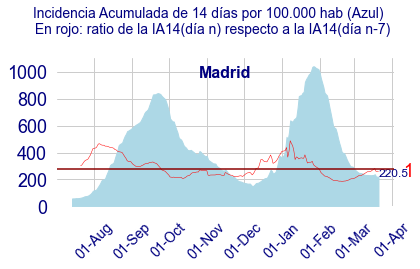

In [56]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

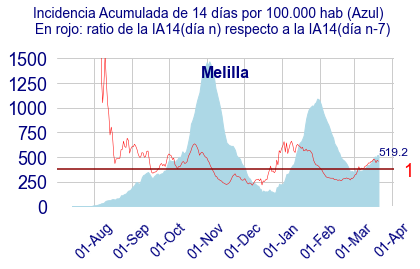

In [57]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

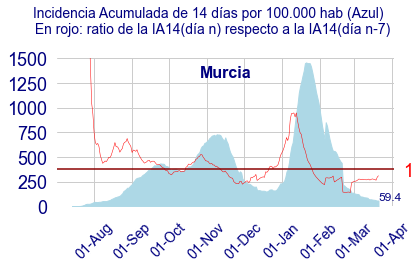

In [58]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

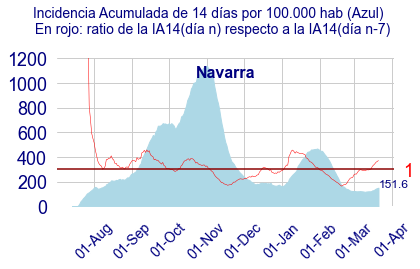

In [59]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

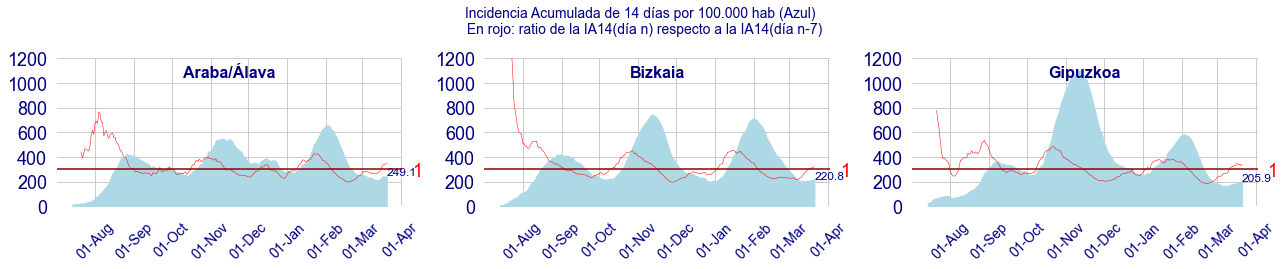

In [60]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

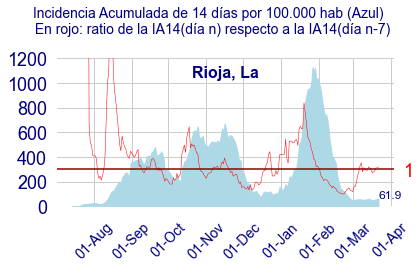

In [61]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

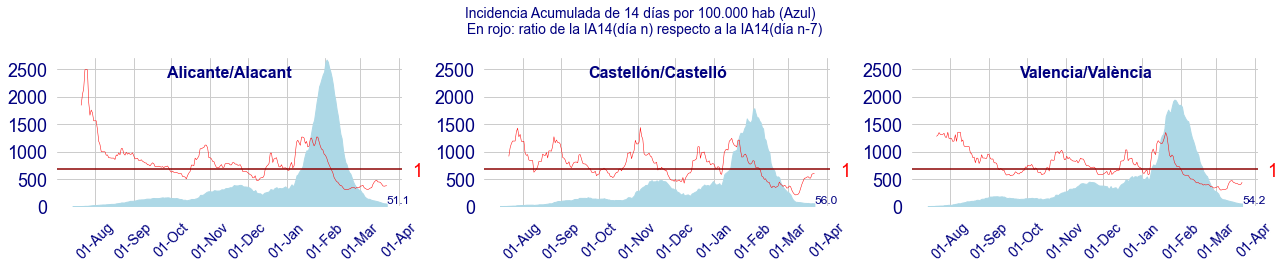

In [62]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

# Gráficos Hospitalizados

In [63]:
def grafico_hospitalizados (datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    hospitalizados = 'hospitalized_per_100000'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1000)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/hospit_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

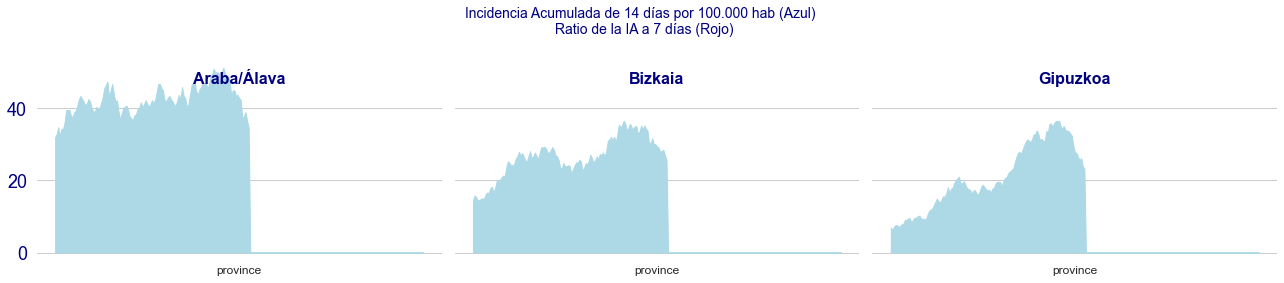

In [64]:
grafico_hospitalizados(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

# Multi provincia con Hospitalizados

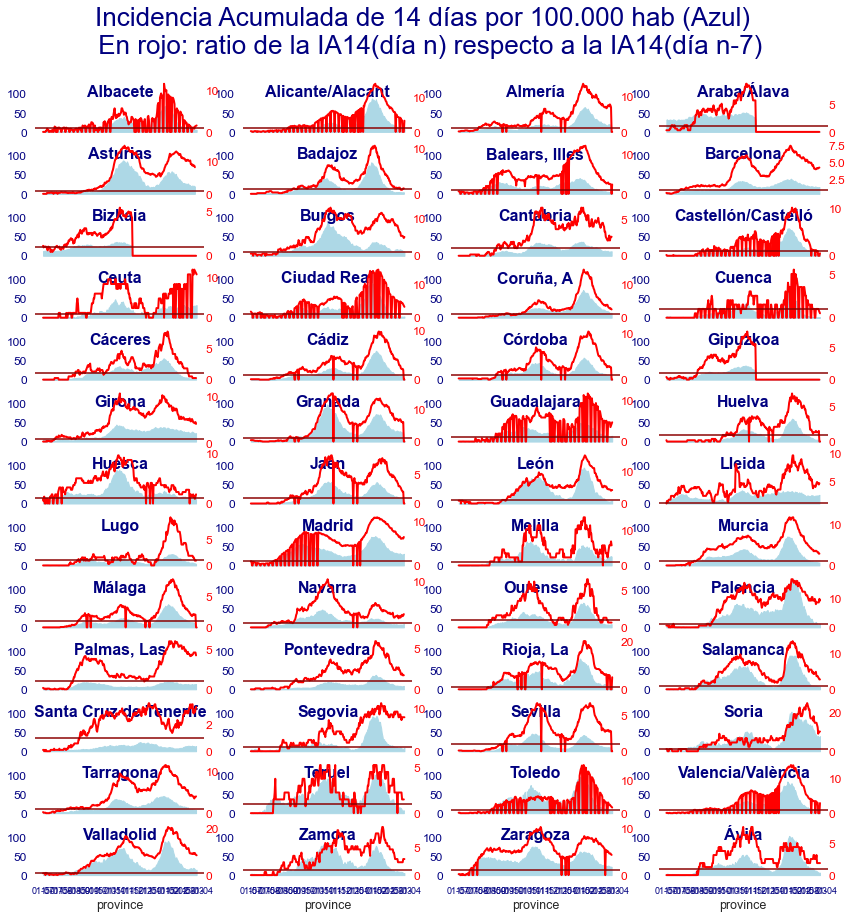

In [65]:

#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título

hospitalizados = 'hospitalized_per_100000'
uci ='intensive_care_per_1000000'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
    #ax1.set_ylim(0,1200)
    #ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[uci], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/hosp_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


In [66]:
def grafico_IA14_ratio_vs(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    color_tags = 'navy'
    clave_ratio = 'tasa_ia_7_dias'
    clave_ratio_IA14 = 'tasa_ia14_7_dias'
    IA14 = 'incidencia_acumulada_14'
    clave_ratio = clave_ratio_IA14
    
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (EjeX) \n Ratio de la IA a 7 días (EjeY)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    #diccionario con el tamaño de los textos dependiendo del numero de columnas:
    #key=nº columnas, values=(tamaño titulos, nombre provincia, tamaño tags,ratio)
    
    text_size={1:(16,16,12,2),2:(22,20,14,2),3:(24,24,16,1.5)}
    datos_ = datos[(datos['date']>=datetime(year=2021,month=1,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(15,15))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', 
                      margin_titles=False, col_wrap=columnas,aspect=text_size[columnas][3], 
                      height=5.0, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    
    x_min = datos_[AI].min()
    x_max = ((datos_[AI].max() // 100)+1)*100
    y_min = datos_[clave_ratio].min()
    y_max = ((datos_[clave_ratio].max() // .5)+1)*.5
    if (y_max != y_max) or (y_max>2):
        y_max = 2
    print (columnas, y_max)
    
    
    def grafica(x, color, label):
        
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        colores1 = sns.color_palette("Blues",df_datos.shape[0])
        
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, 1.0, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=text_size[columnas][1],transform=ax1.transAxes)
        #metemos este cambio para que no intente imprimirla y se va de escala el gráfico
        df_datos.loc[:,clave_ratio]=df_datos.loc[:,clave_ratio].apply(lambda x:min(x,3.0))
        ax1.scatter(df_datos[AI],df_datos[clave_ratio],color=colores1)
    
    
        ax1.set_ylim(0.5,y_max)
        ax1.set_yticks(list(np.arange(0,y_max,1)))
        ax1.set_yticks([.5,1,1.5,2])
        
        ax1.set_xlim(0,x_max)
        #ax1.set_xlim(180,220)
        
        #ax1.set_xticks(np.arange(0,x_max,200))
        
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        #ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=18,width=5,length=10,labelcolor='navy')
        #ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
        df_datos = df_datos.reset_index(drop=True)
        rango=np.arange(0,len(df_datos.index),7)
        rang=np.unique(np.append([0],rango))
        if abs(rang[-1]-len(df_datos.index)) >= 5:
            rang=np.unique(np.append(rango,[0,len(df_datos.index)-1]))
        df_datos= df_datos.iloc[list(rang)]
        ax1.axhline(1,color=color_linea)
        for indice in df_datos.index:
            style = dict(size=text_size[columnas][2], color=color_tags,weight='bold')
            texto = ax1.annotate(df_datos.loc[indice,'date'].strftime('%b%-d'),
                                xy=(df_datos.loc[indice,AI],df_datos.loc[indice,clave_ratio]),
                                xycoords='data',
                                xytext=(5, 5), 
                                textcoords='offset points',
                                **style)
            
        
        
    
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=text_size[columnas][0],color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=1,pad=1)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+'vs_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

1 2.0


<Figure size 1080x1080 with 0 Axes>

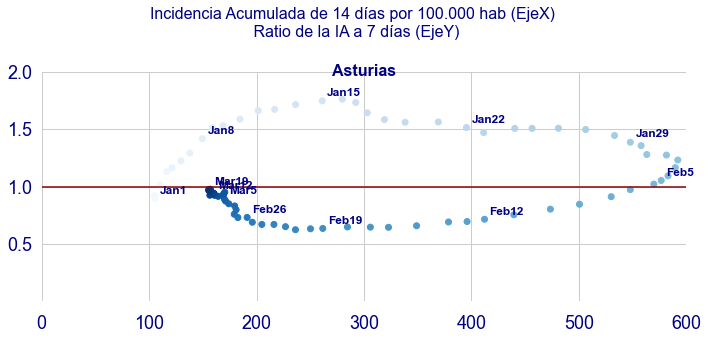

In [67]:
grafico_IA14_ratio_vs(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

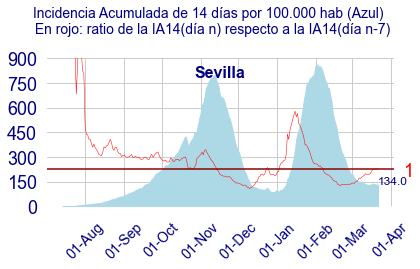

In [68]:
grafico_IA14_ratio(datos,campos,['Sevilla'],'sevilla')

<Figure size 720x360 with 0 Axes>

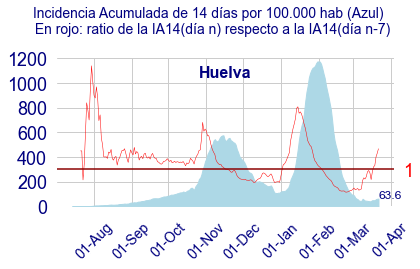

In [69]:
grafico_IA14_ratio(datos,campos,['Huelva'],'huelva')

<Figure size 720x360 with 0 Axes>

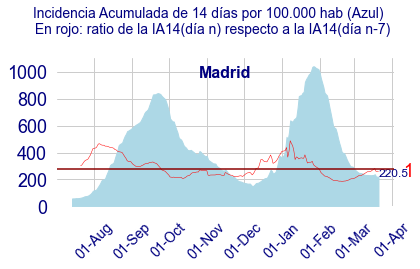

In [70]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

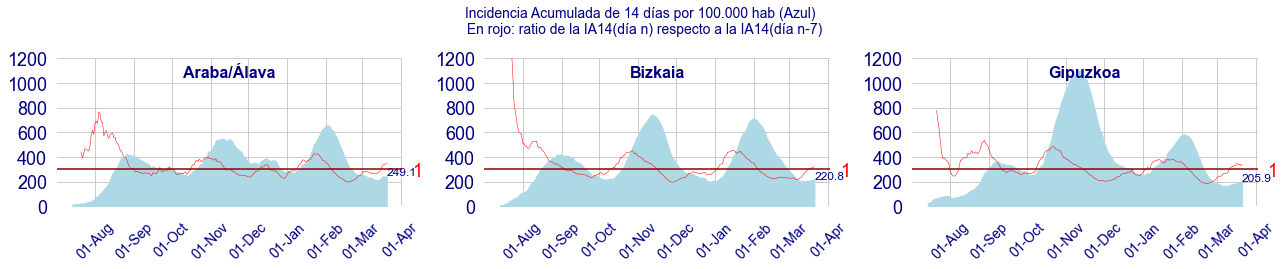

In [71]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

3 2.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

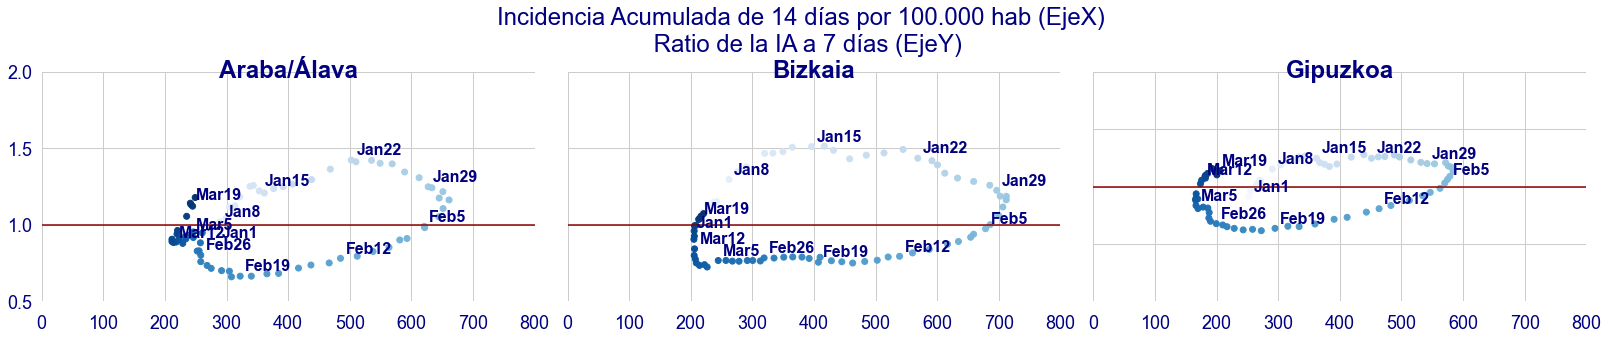

In [72]:
grafico_IA14_ratio_vs(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

1 2.0


<Figure size 1080x1080 with 0 Axes>

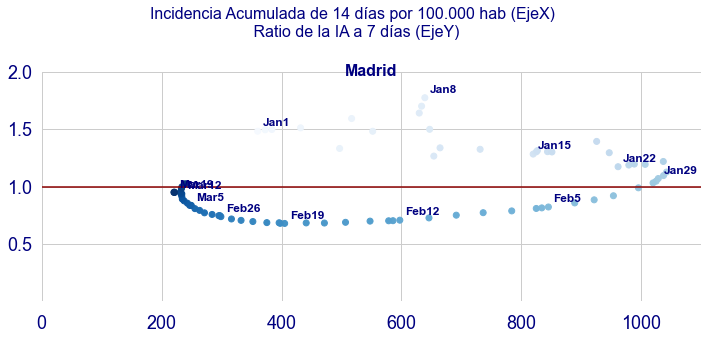

In [73]:
grafico_IA14_ratio_vs(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

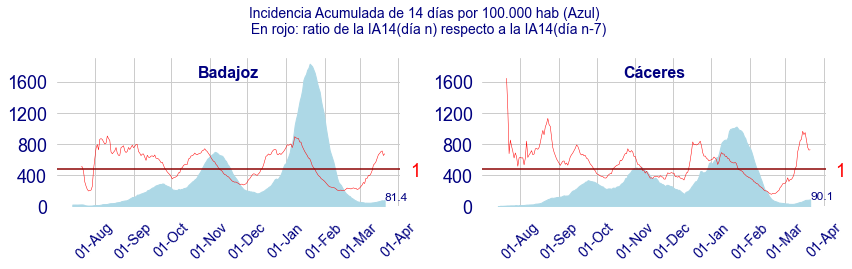

In [74]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

2 2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

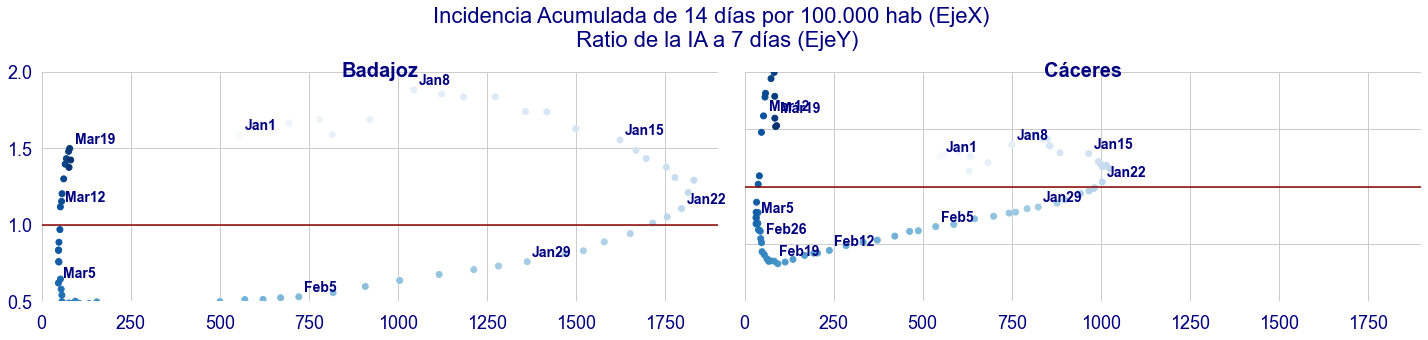

In [75]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz','Cáceres'],'extremadura')

1 2.0


<Figure size 1080x1080 with 0 Axes>

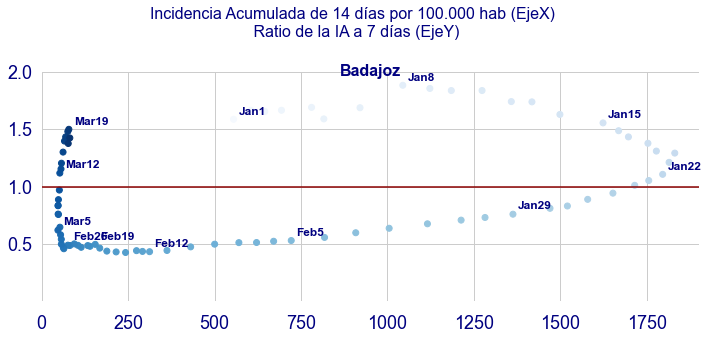

In [76]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz'],'badajoz')

1 2


<Figure size 1080x1080 with 0 Axes>

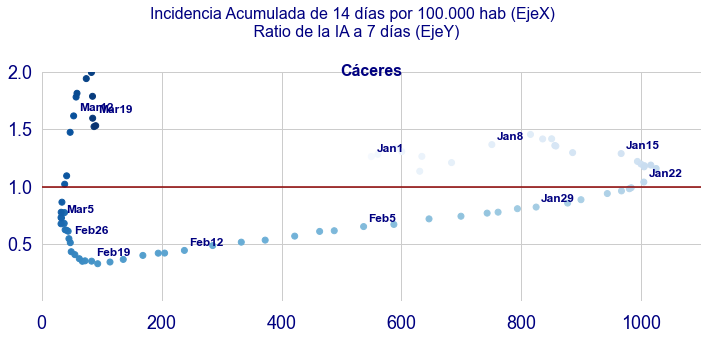

In [77]:
grafico_IA14_ratio_vs(datos,campos,['Cáceres'],'Caceres')

1 2.0


<Figure size 1080x1080 with 0 Axes>

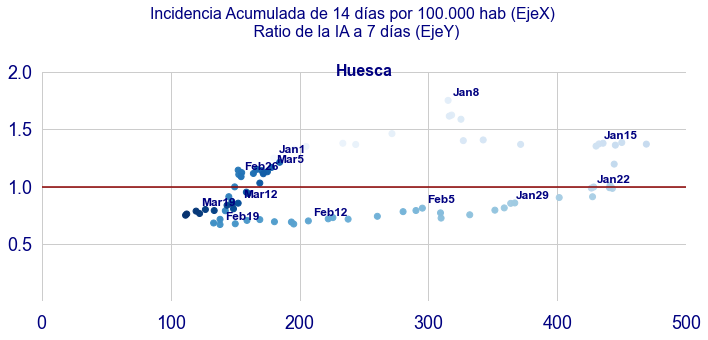

In [78]:
grafico_IA14_ratio_vs(datos,campos,['Huesca'],'huesca')

1 1.5


<Figure size 1080x1080 with 0 Axes>

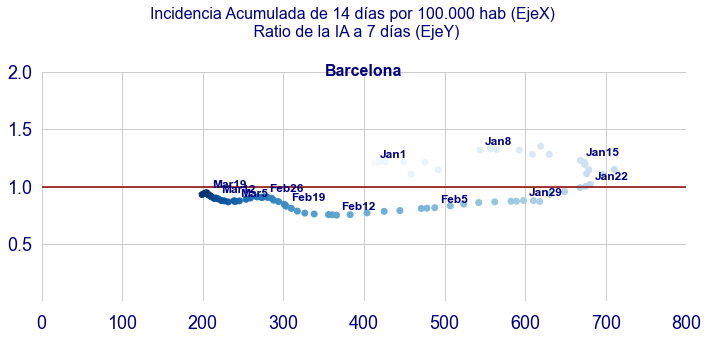

In [79]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona'],'barcelona')

2 1.5


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

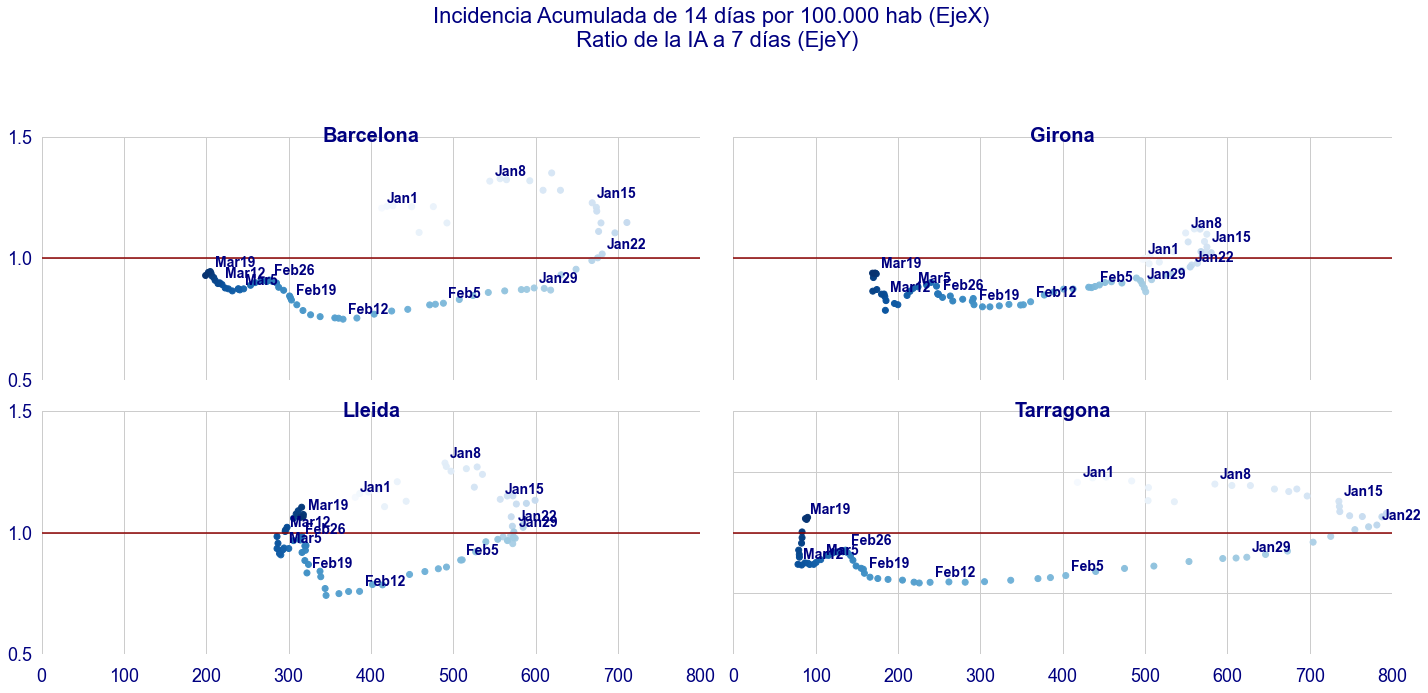

In [80]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

1 2


<Figure size 1080x1080 with 0 Axes>

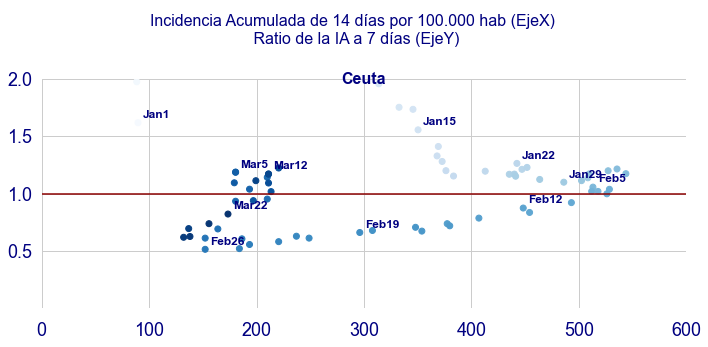

In [81]:
grafico_IA14_ratio_vs(datos,campos,['Ceuta'],'ceuta')

1 2.0


<Figure size 1080x1080 with 0 Axes>

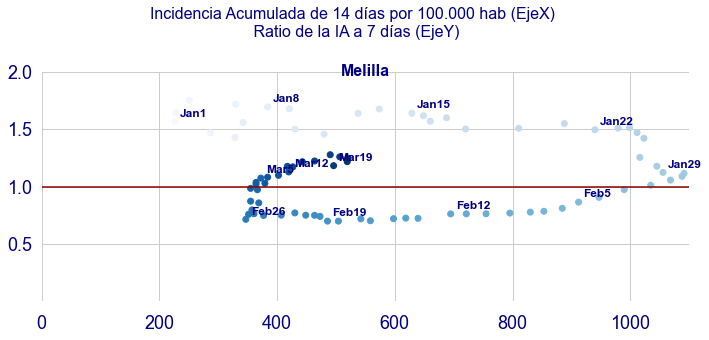

In [82]:
grafico_IA14_ratio_vs(datos,campos,['Melilla'],'melilla')

1 2.0


<Figure size 1080x1080 with 0 Axes>

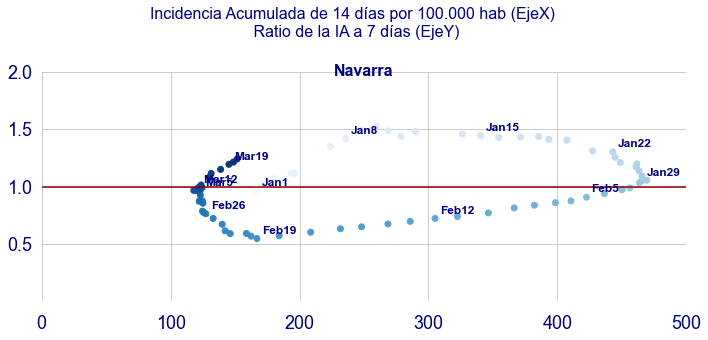

In [83]:
grafico_IA14_ratio_vs(datos,campos,['Navarra'],'navarra')

1 2


<Figure size 1080x1080 with 0 Axes>

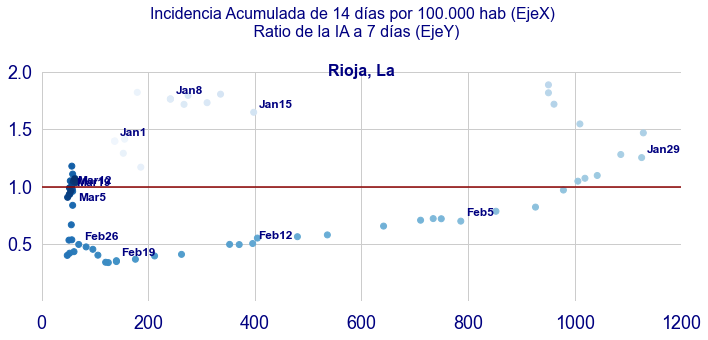

In [84]:
grafico_IA14_ratio_vs(datos,campos,['Rioja, La'],'rioja')

1 2


<Figure size 1080x1080 with 0 Axes>

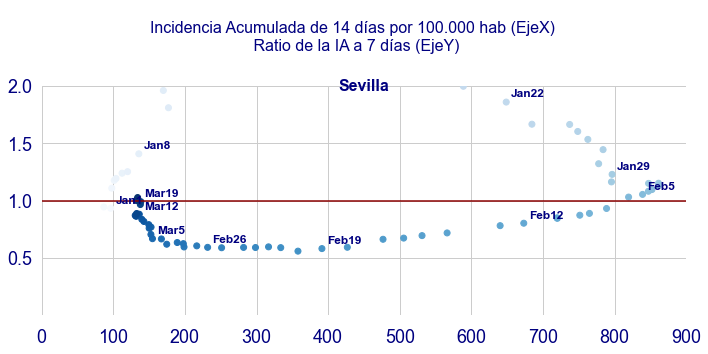

In [85]:
grafico_IA14_ratio_vs(datos,campos,['Sevilla'],'sevilla')

1 2


<Figure size 1080x1080 with 0 Axes>

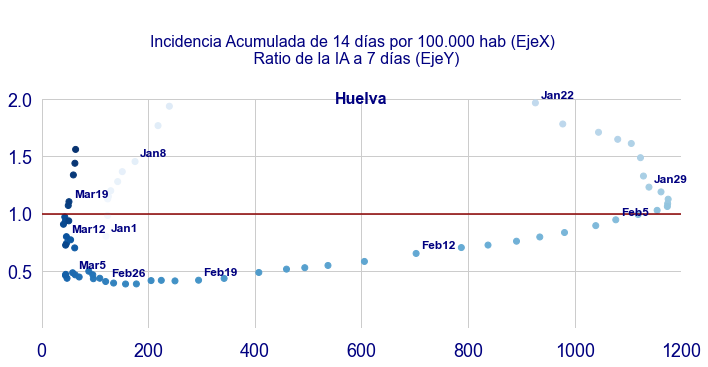

In [86]:
grafico_IA14_ratio_vs(datos,campos,['Huelva'],'huelva')

3 2.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

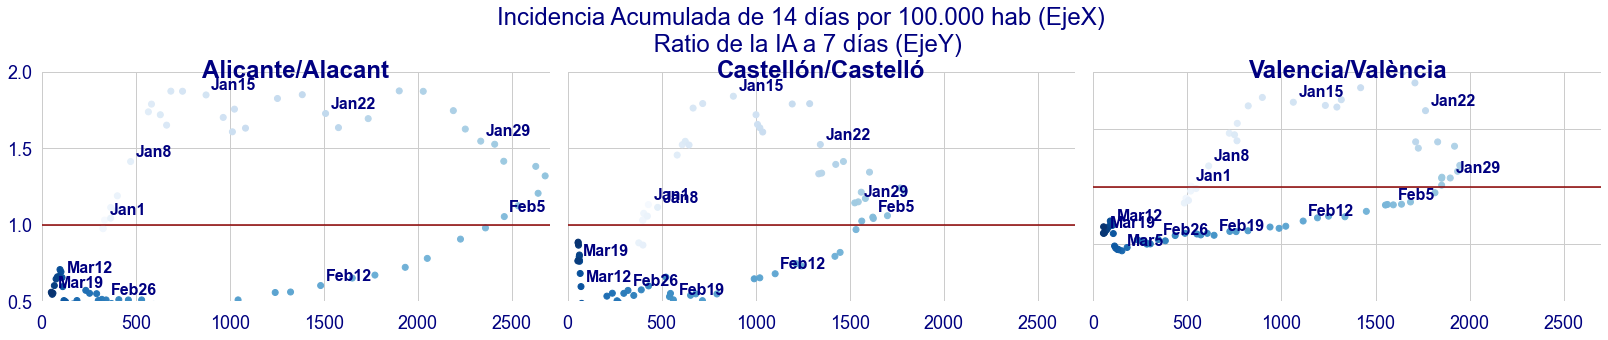

In [87]:
grafico_IA14_ratio_vs(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

3 2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

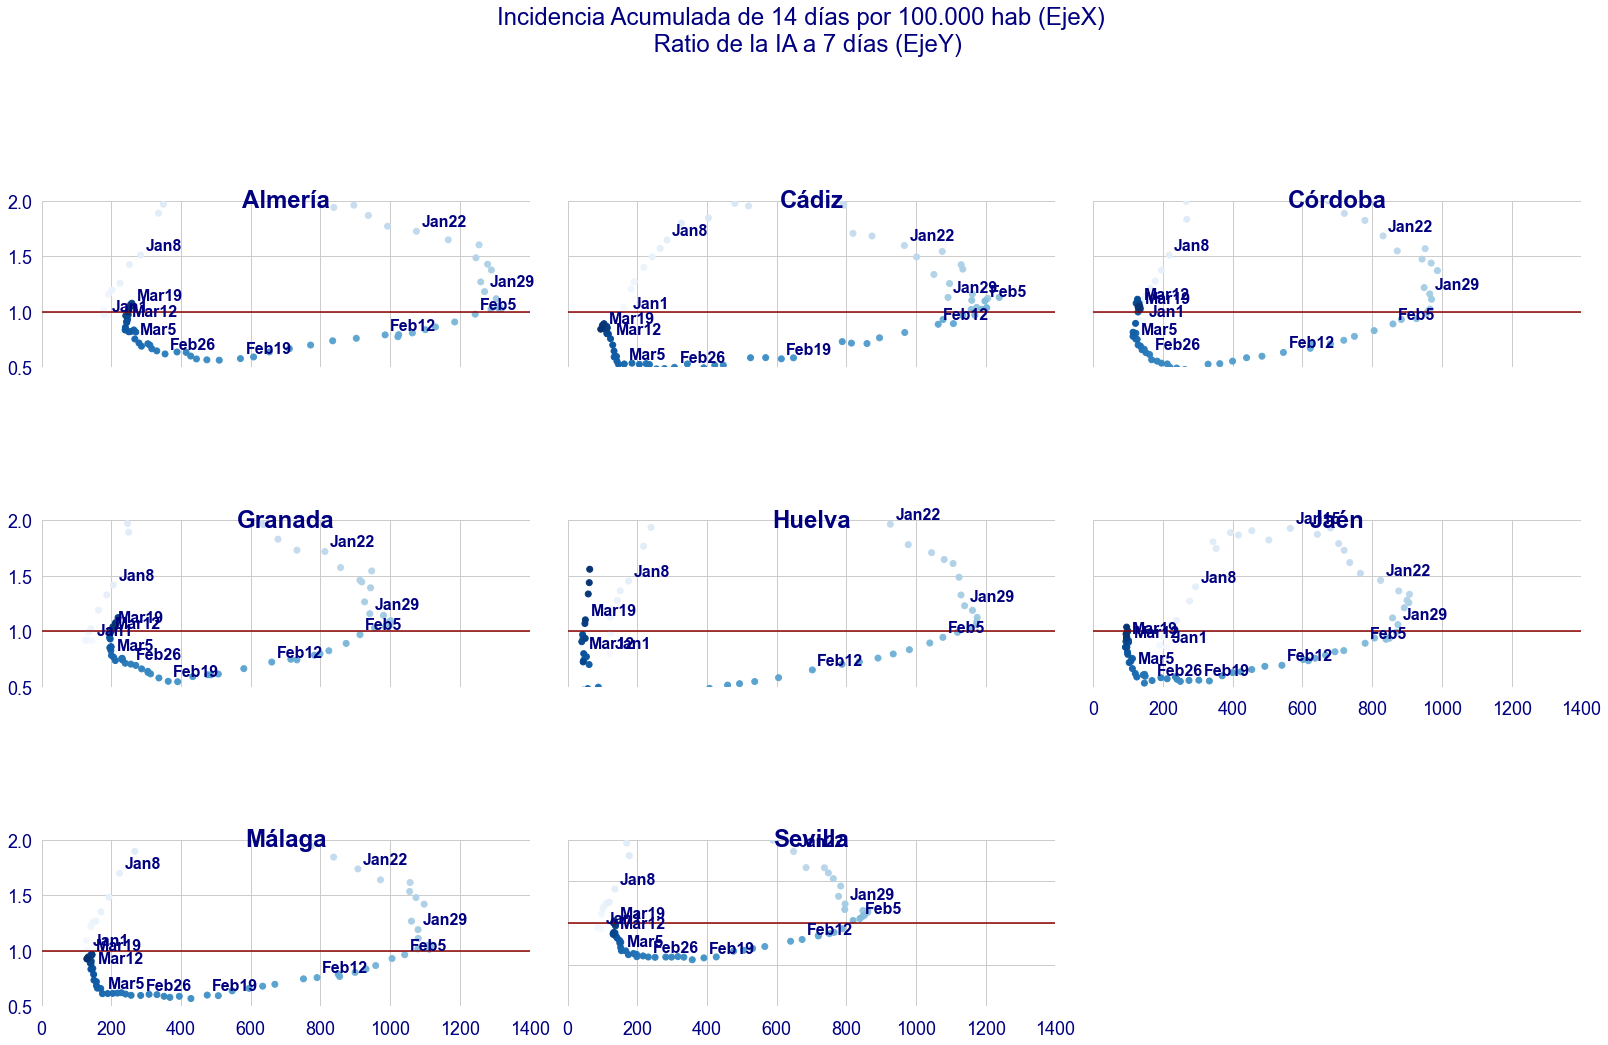

In [88]:
grafico_IA14_ratio_vs(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')